In [9]:
import os
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm

from src.deep.ml_ops import Trainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# load trainer from file
trainer = Trainer.load3('../../data/saved_models/SingleMuModel3Layers_ds-4000_epochs-50_mu-0.008')
# trainer = Trainer.load3('../../data/test_models/SingleMuModel3Layers_ds-120_epochs-2_mu-0.001')

In [11]:
# TODO: create function Trainer.fix_datasets_paths(dataset_path)
trainer.fix_datasets_paths(dataset_path='../../data/datasets', verbose=False)

x.shape=torch.Size([8192, 2]), y.shape=torch.Size([8192, 2])
x_np.shape=(8192, 2),y_np.shape=(8192, 2),pred_np.shape=(8192, 2)


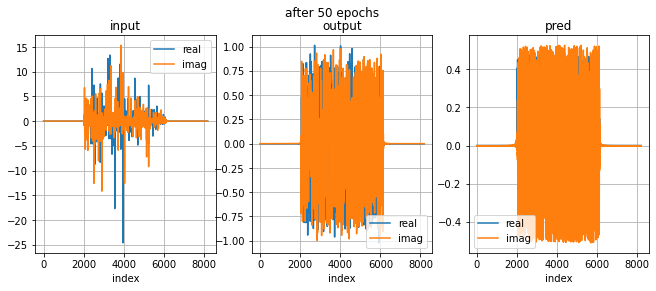

x power=0.42503949999809265
y power=0.10043920576572418
pred power=0.04


In [12]:
trainer.test_single_item(0, verbose=True)

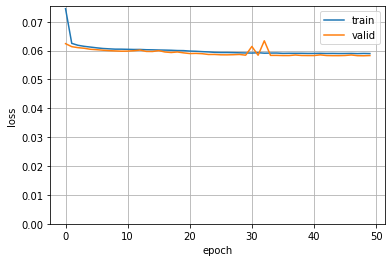

In [13]:
trainer.plot_loss_vec()

In [14]:
# calc original ber
trainer.compare_ber(tqdm=tqdm, num_x_per_folder=15)

  0%|          | 0/15 [00:00<?, ?it/s]

the original avg ber is 0.3918619791666667


  0%|          | 0/15 [00:00<?, ?it/s]

the trained avg ber is 0.31290364583333324
the ber improvement is 20.15%
